In [25]:
#see https://scikit-image.org/docs/stable/auto_examples/filters/plot_cycle_spinning.html#sphx-glr-auto-examples-filters-plot-cycle-spinning-py

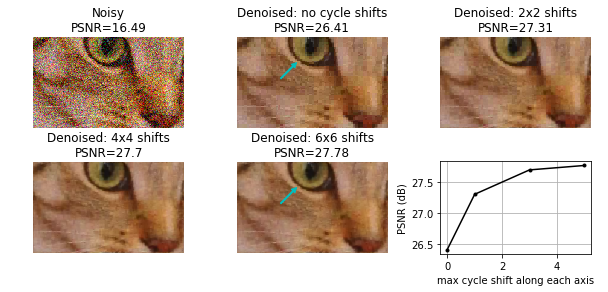

In [24]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, cycle_spin
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 4),
                       sharex=False, sharey=False)
ax = ax.ravel()

psnr_noisy = compare_psnr(original, noisy)
ax[0].imshow(noisy)
ax[0].axis('off')
ax[0].set_title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))


# Repeat denosing with different amounts of cycle spinning.  e.g.
# max_shift = 0 -> no cycle spinning
# max_shift = 1 -> shifts of (0, 1) along each axis
# max_shift = 3 -> shifts of (0, 1, 2, 3) along each axis
# etc...

denoise_kwargs = dict(multichannel=True, convert2ycbcr=True, wavelet='db1')

all_psnr = []
max_shifts = [0, 1, 3, 5]
for n, s in enumerate(max_shifts):
    im_bayescs = cycle_spin(noisy, func=denoise_wavelet, max_shifts=s,
                            func_kw=denoise_kwargs, multichannel=True)
    ax[n+1].imshow(im_bayescs)
    ax[n+1].axis('off')
    psnr = compare_psnr(original, im_bayescs)
    if s == 0:
        ax[n+1].set_title(
            "Denoised: no cycle shifts\nPSNR={:0.4g}".format(psnr))
    else:
        ax[n+1].set_title(
            "Denoised: {0}x{0} shifts\nPSNR={1:0.4g}".format(s+1, psnr))
    all_psnr.append(psnr)

# plot PSNR as a function of the degree of cycle shifting
ax[5].plot(max_shifts, all_psnr, 'k.-')
ax[5].set_ylabel('PSNR (dB)')
ax[5].set_xlabel('max cycle shift along each axis')
ax[5].grid('on')
plt.subplots_adjust(wspace=0.35, hspace=0.35)

# Annotate with a cyan arrow on the 6x6 case vs. no cycle shift case to
# illustrate a region with reduced block-like artifact with cycle shifting
arrowprops = dict(arrowstyle="simple,tail_width=0.1,head_width=0.5",
                  connectionstyle="arc3",
                  color='c')
for i in [1, 4]:
    ax[i].annotate("", xy=(101, 39), xycoords='data',
                   xytext=(70, 70), textcoords='data',
                   arrowprops=arrowprops)

plt.show()

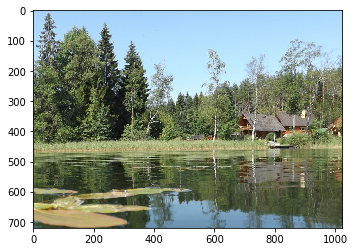

In [27]:
path = '..\\..\\images\\train\\dt_train_1.jpg'
image = mpimg.imread(path)
imgplot = plt.imshow(image)

In [28]:
image

array([[[169, 211, 253],
        [169, 211, 253],
        [169, 211, 253],
        ...,
        [172, 216, 253],
        [172, 216, 253],
        [172, 216, 253]],

       [[169, 211, 253],
        [169, 211, 253],
        [169, 211, 253],
        ...,
        [172, 216, 253],
        [172, 216, 253],
        [172, 216, 253]],

       [[169, 211, 253],
        [169, 211, 253],
        [169, 211, 253],
        ...,
        [172, 216, 253],
        [172, 216, 253],
        [172, 216, 253]],

       ...,

       [[ 85, 115, 115],
        [ 85, 115, 115],
        [ 87, 116, 114],
        ...,
        [121, 154, 171],
        [115, 148, 165],
        [105, 141, 157]],

       [[ 83, 113, 115],
        [ 86, 116, 118],
        [ 89, 119, 119],
        ...,
        [124, 156, 177],
        [115, 150, 170],
        [107, 142, 162]],

       [[ 79, 110, 112],
        [ 84, 115, 117],
        [ 88, 119, 121],
        ...,
        [124, 159, 181],
        [120, 155, 177],
        [113, 148, 170]]

In [36]:

forest = img_as_float(image)#[100:250, 50:300])

sigma = 0.155
noisy = random_noise(forest, var=sigma**2)

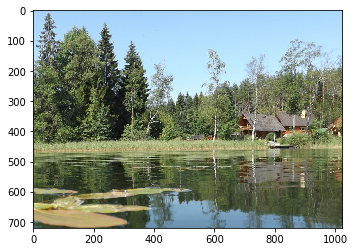

In [37]:
imgplot = plt.imshow(image)

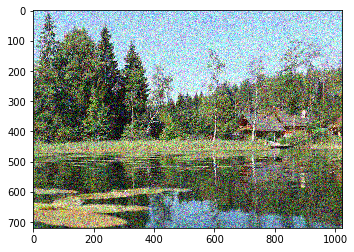

In [38]:
imgplot = plt.imshow(noisy)

In [49]:
#experimenting different noise functions 

In [43]:
'''
One of the following strings, selecting the type of noise to add:

‘gaussian’ Gaussian-distributed additive noise.
‘localvar’ Gaussian-distributed additive noise, with specified
local variance at each point of image.
‘poisson’ Poisson-distributed noise generated from the data.
‘salt’ Replaces random pixels with 1.
‘pepper’ Replaces random pixels with 0 (for unsigned images) or
-1 (for signed images).
‘s&p’ Replaces random pixels with either 1 or low_val, where
low_val is 0 for unsigned images or -1 for signed images.
‘speckle’ Multiplicative noise using out = image + n*image, where
n is uniform noise with specified mean & variance.
'''

'\nOne of the following strings, selecting the type of noise to add:\n\n‘gaussian’ Gaussian-distributed additive noise.\n‘localvar’ Gaussian-distributed additive noise, with specified\nlocal variance at each point of image.\n‘poisson’ Poisson-distributed noise generated from the data.\n‘salt’ Replaces random pixels with 1.\n‘pepper’ Replaces random pixels with 0 (for unsigned images) or\n-1 (for signed images).\n‘s&p’ Replaces random pixels with either 1 or low_val, where\nlow_val is 0 for unsigned images or -1 for signed images.\n‘speckle’ Multiplicative noise using out = image + n*image, where\nn is uniform noise with specified mean & variance.\n'

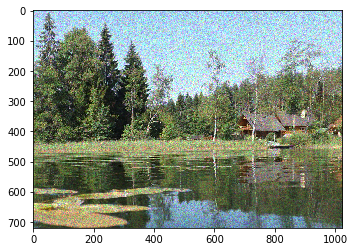

In [44]:
plt.imshow(random_noise(forest, mode = 'speckle', var=sigma**2))

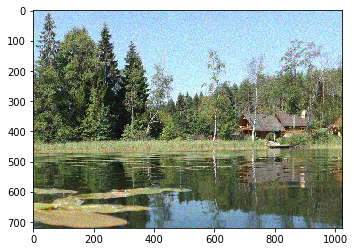

In [45]:
plt.imshow(random_noise(forest, mode = 'poisson'))

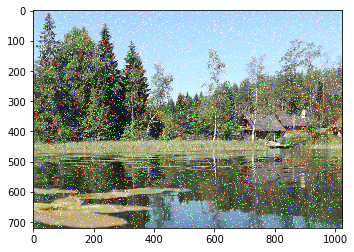

In [46]:
plt.imshow(random_noise(forest, mode = 'salt'))

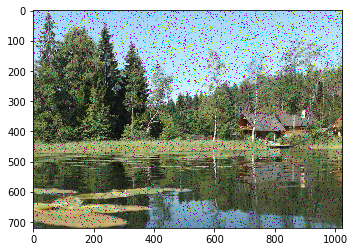

In [47]:
plt.imshow(random_noise(forest, mode = 'pepper'))

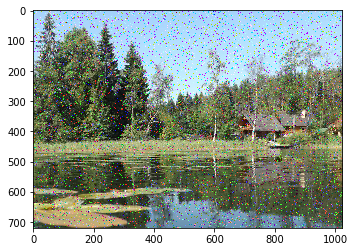

In [55]:
plt.imshow(random_noise(forest, mode = 's&p'))

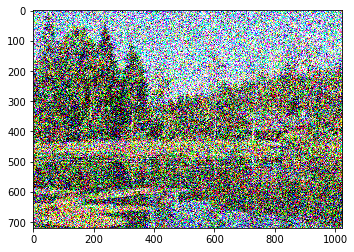

In [53]:
plt.imshow(random_noise(forest, var=.5**2))

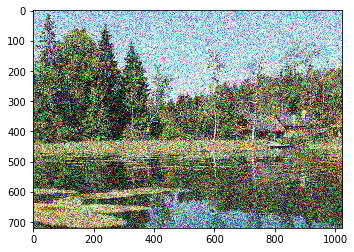

In [54]:
plt.imshow(random_noise(forest, var=.25**2))

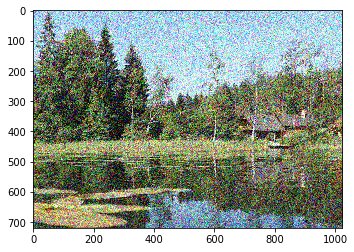

In [56]:
plt.imshow(random_noise(forest, var=.2**2))

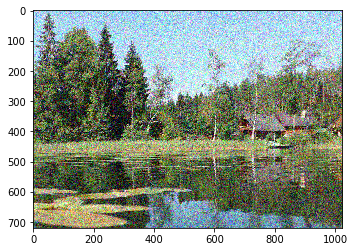

In [57]:
plt.imshow(random_noise(forest, var=.15**2))

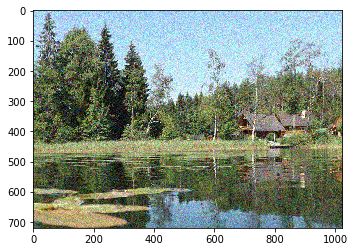

In [61]:
plt.imshow(random_noise(forest, var=.1**2))

In [62]:
#we will try .1 for now

In [63]:
def NoisifyImage(image, sigma):
    image = mpimg.imread(path)
    image = img_as_float(image)
    return random_noise(image, var=sigma**2)


In [69]:
origImage = mpimg.imread('..\\..\\images\\train\\dt_train_1.jpg')

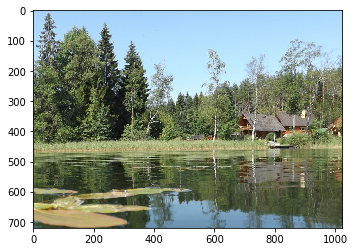

In [70]:
plt.imshow(origImage)

In [65]:
noisedImage = NoisifyImage('..\\..\\images\\train\\dt_train_1.jpg',0.155)

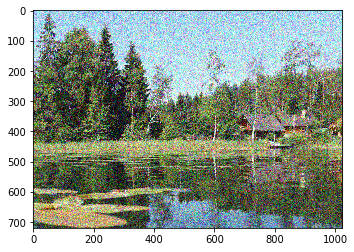

In [66]:
plt.imshow(noisedImage)